In [2]:
pip install python-Levenshtein

Defaulting to user installation because normal site-packages is not writeable
  Using cached python_Levenshtein-0.22.0-py3-none-any.whl (9.4 kB)
  Using cached Levenshtein-0.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (172 kB)
  Using cached rapidfuzz-3.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
import os


In [2]:

path = os.getcwd()
print(os.listdir())
pathfile = path + "/data.xlsx"
df = pd.read_excel(pathfile, sheet_name="Sheet3")
display(df)

['requirements.txt', 'main.ipynb', 'data.xlsx', '.git', 'pacient_treatment_analysis', 'env']


,FECHA,NO. DÍA,DÍA,NO. MES,MES,AÑO,SEMANA,NOMBRE,INGRESOS,TX,EDAD,SEXO,TIPO_PX,MEDIO
0,2022-01-04,2,MARTES,1,ENERO,2022,2,José Consuelo Calderón,50,"Se realizó valoración y presupuesto, entrego r...",NaN,NaN,SUBSECUENTE,NaN
1,2022-01-04,2,MARTES,1,ENERO,2022,2,David Romero (niño),50,"Se realizó HC, valoración, odontograma.",NaN,NaN,PRIMERA VEZ,RECOMENDACIÓN
2,2022-01-04,2,MARTES,1,ENERO,2022,2,Ricarda Zavaleta Loaeza.,300,"Se realizó valoración, HC, curación od 47, se ...",NaN,NaN,PRIMERA VEZ,DOCTORALIA
3,2022-01-04,2,MARTES,1,ENERO,2022,2,Virginia Sotelo Terán,700,Se realizó exo de restos radiculares 35 y36.,NaN,NaN,SUBSECUENTE,NaN
4,2022-01-04,2,MARTES,1,ENERO,2022,2,Luis Enrique Villalobos Flores.,500,Se realizó resina od 25. Plan de pagos fijos,NaN,NaN,SUBSECUENTE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,2023-09-29,5,VIERNES,9,SEPTIEMBRE,2023,39,ANTONIA BANDA ALLENDE,700,RESINA OD 26,56.0,F,Subsecuente,NaN
1489,2023-09-29,5,VIERNES,9,SEPTIEMBRE,2023,39,GLORIA SANTIBAÑEZ CASTELLANOS,59,CONSULTA 1ERA VEZ,51.0,F,Primera Vez,Recomendación
1490,2023-09-29,5,VIERNES,9,SEPTIEMBRE,2023,39,DANNA PAOLA BARRETO CARDENAS,400,LIMPIEZA DENTAL,20.0,F,Primera Vez,Recomendación
1491,2023-09-29,5,VIERNES,9,SEPTIEMBRE,2023,39,ARACELI PADILLA ADAME,700,EXODONCIA OD 26,42.0,F,Subsecuente,NaN


In [3]:
df = df[['NOMBRE', 'INGRESOS', 'TX', 'TIPO_PX', 'MEDIO']]
display(df)

,NOMBRE,INGRESOS,TX,TIPO_PX,MEDIO
0,José Consuelo Calderón,50,"Se realizó valoración y presupuesto, entrego r...",SUBSECUENTE,NaN
1,David Romero (niño),50,"Se realizó HC, valoración, odontograma.",PRIMERA VEZ,RECOMENDACIÓN
2,Ricarda Zavaleta Loaeza.,300,"Se realizó valoración, HC, curación od 47, se ...",PRIMERA VEZ,DOCTORALIA
3,Virginia Sotelo Terán,700,Se realizó exo de restos radiculares 35 y36.,SUBSECUENTE,NaN
4,Luis Enrique Villalobos Flores.,500,Se realizó resina od 25. Plan de pagos fijos,SUBSECUENTE,NaN
...,...,...,...,...,...
1488,ANTONIA BANDA ALLENDE,700,RESINA OD 26,Subsecuente,NaN
1489,GLORIA SANTIBAÑEZ CASTELLANOS,59,CONSULTA 1ERA VEZ,Primera Vez,Recomendación
1490,DANNA PAOLA BARRETO CARDENAS,400,LIMPIEZA DENTAL,Primera Vez,Recomendación
1491,ARACELI PADILLA ADAME,700,EXODONCIA OD 26,Subsecuente,NaN


In [8]:
key_words = [
    {
        'Traditional': ['consulta', 'consulta primera vez', 'limpieza', 'resina', 'limpieza dental', 'profilaxis', 'valoracion'],
        'Priority': [],
        'Premier': []
    }
]

In [35]:
df['INGRESOS'].max()

TypeError: '>=' not supported between instances of 'int' and 'str'

In [13]:
# Extract the list of words from 'Traditional' key
traditional_words = key_words[0]['Traditional']

# Create a regular expression pattern to match any of the words
pattern = '|'.join(traditional_words)

# Use str.contains() to check for matches
df['Match'] = df['TX'].str.contains(pattern, case=False)

# Replace True with 'traditional'
df['Match'] = np.where(df['Match'], 'traditional', df['Match'])

display(df)

,NOMBRE,INGRESOS,TX,TIPO_PX,MEDIO,Match
0,José Consuelo Calderón,50,"Se realizó valoración y presupuesto, entrego r...",SUBSECUENTE,NaN,traditional
1,David Romero (niño),50,"Se realizó HC, valoración, odontograma.",PRIMERA VEZ,RECOMENDACIÓN,False
2,Ricarda Zavaleta Loaeza.,300,"Se realizó valoración, HC, curación od 47, se ...",PRIMERA VEZ,DOCTORALIA,False
3,Virginia Sotelo Terán,700,Se realizó exo de restos radiculares 35 y36.,SUBSECUENTE,NaN,False
4,Luis Enrique Villalobos Flores.,500,Se realizó resina od 25. Plan de pagos fijos,SUBSECUENTE,NaN,traditional
...,...,...,...,...,...,...
1488,ANTONIA BANDA ALLENDE,700,RESINA OD 26,Subsecuente,NaN,traditional
1489,GLORIA SANTIBAÑEZ CASTELLANOS,59,CONSULTA 1ERA VEZ,Primera Vez,Recomendación,traditional
1490,DANNA PAOLA BARRETO CARDENAS,400,LIMPIEZA DENTAL,Primera Vez,Recomendación,traditional
1491,ARACELI PADILLA ADAME,700,EXODONCIA OD 26,Subsecuente,NaN,False


AxesSubplot(0.125,0.11;0.775x0.77)


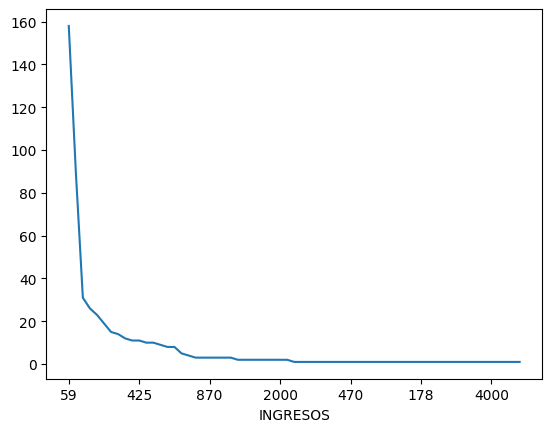

In [34]:
df.dropna(inplace=True)

print(df['INGRESOS'].value_counts().plot())

In [7]:
display(df)

,NOMBRE,INGRESOS,TX,TIPO_PX,MEDIO,Match
0,José Consuelo Calderón,50,"Se realizó valoración y presupuesto, entrego r...",SUBSECUENTE,NaN,True
1,David Romero (niño),50,"Se realizó HC, valoración, odontograma.",PRIMERA VEZ,RECOMENDACIÓN,False
2,Ricarda Zavaleta Loaeza.,300,"Se realizó valoración, HC, curación od 47, se ...",PRIMERA VEZ,DOCTORALIA,False
3,Virginia Sotelo Terán,700,Se realizó exo de restos radiculares 35 y36.,SUBSECUENTE,NaN,False
4,Luis Enrique Villalobos Flores.,500,Se realizó resina od 25. Plan de pagos fijos,SUBSECUENTE,NaN,True
...,...,...,...,...,...,...
1488,ANTONIA BANDA ALLENDE,700,RESINA OD 26,Subsecuente,NaN,True
1489,GLORIA SANTIBAÑEZ CASTELLANOS,59,CONSULTA 1ERA VEZ,Primera Vez,Recomendación,True
1490,DANNA PAOLA BARRETO CARDENAS,400,LIMPIEZA DENTAL,Primera Vez,Recomendación,True
1491,ARACELI PADILLA ADAME,700,EXODONCIA OD 26,Subsecuente,NaN,False
